In [32]:
import tensorflow as tf
# %matplotlib inline 
import matplotlib.pyplot as plt


# Get the mnist dataset
mnist = tf.keras.datasets.mnist

# Unpack the dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Loop over and print (each array has 60k items)
# Printing individual data from x_train/test shows us the array of data values from 0-255.
# This data will later be normalized for easier usage

# for item in range(len(x_train)):
#     print("Item " +str(item))
#     print(x_train[item])


# Using pyplot to view data as images
# https://stackoverflow.com/questions/2659312/how-do-i-convert-a-numpy-array-to-and-display-an-image
# print("Enter which index you want to view. ")
# item = input()
# plt.imshow(x_train[int(item)], interpolation='nearest')
# plt.show()

# Normalize the data to between 0-1 rather than 0-255
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# print(x_train[0])

# Added Flatten(), could not compile without
# SGD optimizer gives less than .5 accuracy first run.. less than .02 second run?

# Sequential model
model = tf.keras.models.Sequential()
# Use keras to flatten our input layer to a single dimension array
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# 128 neurins, relu (rectified linear) as activation function
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# Output Layer - 10 neurons, using Softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# Training params for the model: using 'adam' optimizer, loss for degree of error, return accuracy metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model, Define 'epochs', how many times we run the training
model.fit(x_train, y_train, epochs=3)
# model.save('sgd_TestModel')


Epoch 1/3
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2583 - acc: 0.9238
Epoch 2/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1063 - acc: 0.9668
Epoch 3/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0731 - acc: 0.9772


In [33]:
# Calculate the loss and accuracy validations
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0950 - acc: 0.9708
0.09500520302243531 0.9708


In [34]:
# Save teh model
model.save('adam_TestModel.model')

In [35]:
# Load the saved Model
working_model = tf.keras.models.load_model('adam_TestModel.model')

In [36]:
# Predictions is the loaded model predicting what number it has been given from the test set
predictions = working_model.predict([x_test])
print(predictions)

[[6.6595335e-10 6.1877126e-09 4.4167558e-07 ... 9.9997258e-01
  1.3816723e-08 7.7124668e-08]
 [2.6668724e-07 1.3376152e-04 9.9984419e-01 ... 1.3667726e-07
  1.3771010e-05 1.9860362e-11]
 [1.9162938e-08 9.9955255e-01 2.1014070e-05 ... 3.4306329e-04
  6.6252069e-05 1.5479812e-07]
 ...
 [6.9996919e-10 2.8273104e-07 4.1239389e-08 ... 2.1096955e-04
  3.2121082e-07 8.8809425e-04]
 [1.7906964e-07 3.9542570e-08 2.8060574e-09 ... 2.1768047e-07
  2.0493974e-03 1.8633834e-07]
 [1.1419605e-06 8.6887003e-10 1.9712877e-08 ... 2.8130427e-11
  4.3454941e-07 5.4130593e-09]]


In [40]:
# Using numpy to display the predicted number in the list
import numpy as np
print(np.argmax(predictions[2]))

1


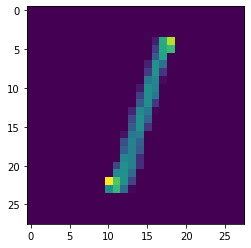

In [41]:
# Using matplotlib to display the predicted number for comparison
plt.imshow(x_test[2])
plt.show()